## 1. Python's Sequence Type

Python's Sequence Type:
    - List
    - Tuple
    - Str
    
Commonality:
1. supports indexing to access individual element
2. Uses a low-level concept **array** to represent the sequence

## 2. Low-Level Arrays

Prerequisite concept:
1. memory address:
    - To keep track of what information is stored in what byte.
    - Each byte of memory is associated with a unique number as its address.
    - Memory addresses are typically coordinated with the physical layout of the memory system, so the address numbers have sequential nature.

2. Machine Architecture
    - 64-bit means each memory address is a 64-bit number(8 bytes)
    - 32-bit
    
3. RAM(random access memory):
    - a computer's main memory
    - Any bytes can be efficiently accessed based upon its memory address. Retrieved in O(1)
    - Random: 当存储器进行读写操作时，所需要的时间与这段信息所在的或要存入的位置无关
    - 与CPU直接交换数据，可以随时读写，且速度很快，通常作为操作系统或其他正在运行中的程序的临时数据存储介质。
    - 数据易失性：一旦断电，数据丢失

4. Array:
    - A group of related variables stored one after another in a contiguous portion of the computer's memory.
    

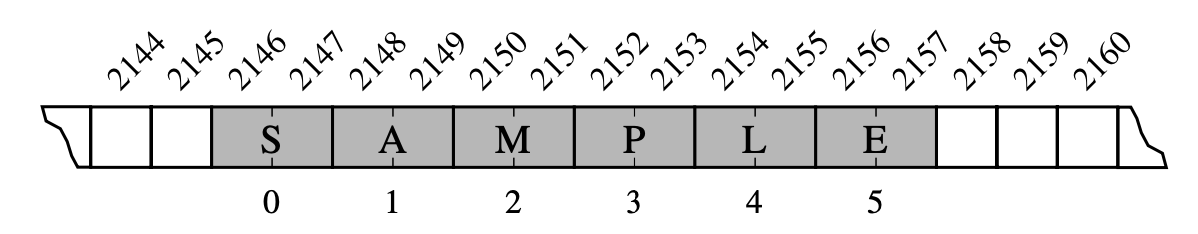

    - Python internally represents each Unicode charater with 16 bits.
    - Each location within an array is a cell
    - The cell of the array with index 4 has content L and is stored in bytes 2154 and 2155
    - Each cell of an array must use the same number of bytes to allow constant retrieval time.

### 2.1 Referential Arrays

**List or Tuple**：store consecutive sequence of memory addresse 而非element本身
    - 避免空间的浪费： If each elements are strings with different length, python need to reserve enough space for each cell to hold the maximum length string
    - 每一个element地址所需的bits保持一致，从而确保constant-time access based on index


Referential Arrays的性质：
1. A single list instance may include multiple references to the same objects as elements, and a single object may be an element of two or more lists.
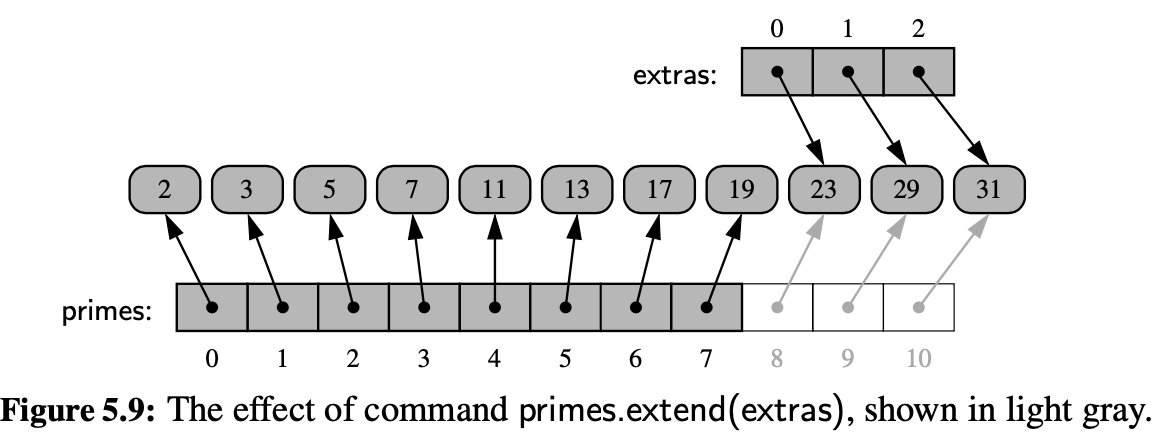

When elements inside the lists are immutable objects, changing the element by index will actually changes the reference in cell, to reference a different object.
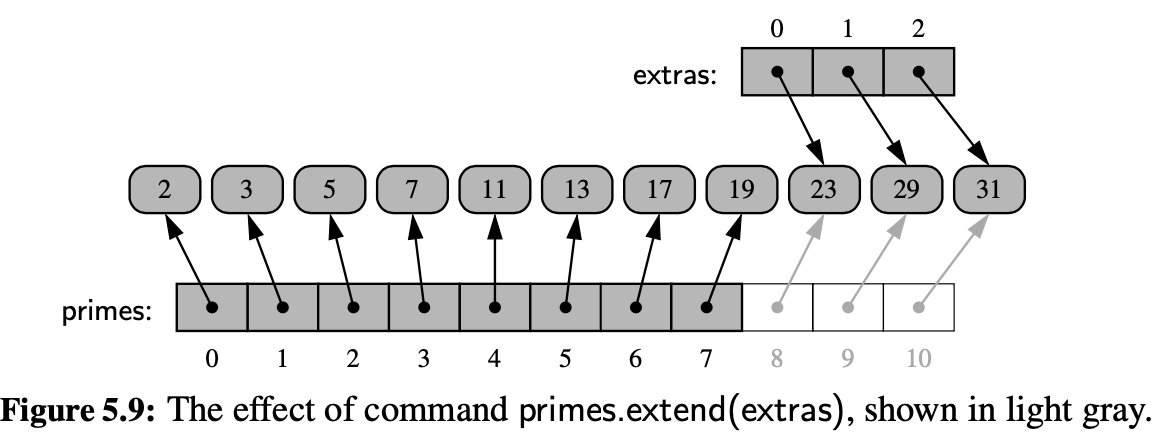

2. Extend command:
    - Receive references rather than the copies of those elements.
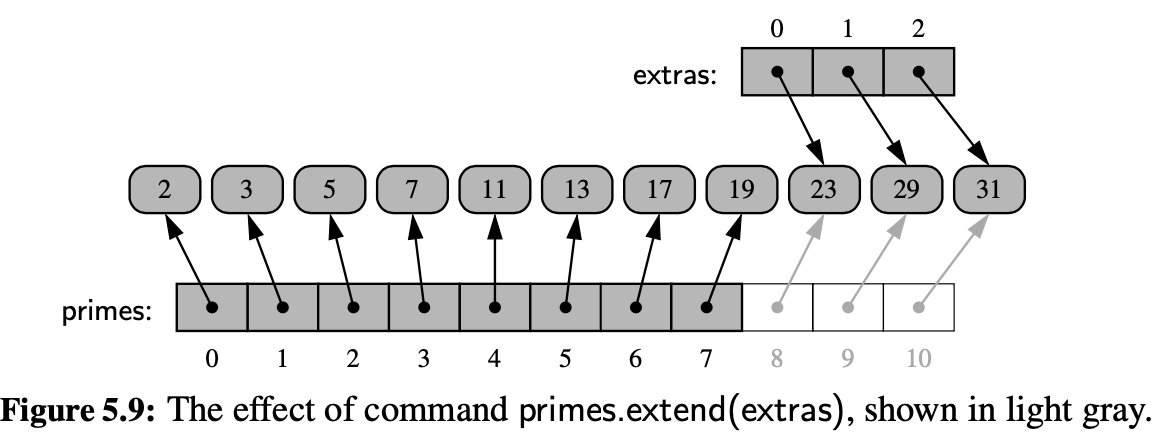

### 2.2 Compact Arrays in Python

**strings**
    - Strings are represented using an array of characters(not an array of references)

Compact Arrays:
    - The array is storing the bits that represent the primary data instead of the memory addresses.
    
Compact Arrays advantages:
1. Overall memory usage is much lower.
    - No overhead devoted to the memory references
    - Each element in a list will typically use 64-bits for the memory address
2. The primary data are stored consecutively in memory.
    - Convenient to have data stored in memory near other data that might be used in the same computations
    
**To create compact arrays of various types, import module named array.**

In [25]:
import array
import sys
primes = [2,3,5,7,11,13,17,19]
print(sys.getsizeof(primes))

# the module array define a class array providing compact storages 
# for arrays of primitive data types
array_primes = array.array('i',[2,3,5,7,11,13,17,19])
print(sys.getsizeof(array_primes))

136
96


## 3. Dynamic Arrays and Amortization

When creating a low-level array, the precise size of that array must be explicitly declared in order for the system to properly allocate a consecutive piece of memory for its storage.
<br><br>
So the capacity of an array cannot be increased by expanding into subsequent cells.
    - tuple or str class: immutable, the correct size for an underlying array can be fixed when the object is instantiated.
    - list: dynamic array
    
#### Dynamic Array

1. A list instance maintains an underlying array that often has greater capacity than the current length of the list.
    - l = [0]*5, the system may have reserved an underlying array of eight elements size
2. When the reserved capacity eventually exhausted, the class requests a new, larger array, and initializes it to have same prefix. The old array is reclaimed

#### sys.getsizeof()

Reports the number of bytes devoted to the array and other instance variables of the list.<br>
But <font color='red'> NOT </font> any space devoted to elements referenced by the list.

In [31]:
data = []
for k in range(18):
    a = len(data)
    b = sys.getsizeof(data)
    print('Length: {0:3d}; Size in bytes: {1:4d}'.format(a,b))
    data.append(None)

Length:   0; Size in bytes:   72
Length:   1; Size in bytes:  104
Length:   2; Size in bytes:  104
Length:   3; Size in bytes:  104
Length:   4; Size in bytes:  104
Length:   5; Size in bytes:  136
Length:   6; Size in bytes:  136
Length:   7; Size in bytes:  136
Length:   8; Size in bytes:  136
Length:   9; Size in bytes:  200
Length:  10; Size in bytes:  200
Length:  11; Size in bytes:  200
Length:  12; Size in bytes:  200
Length:  13; Size in bytes:  200
Length:  14; Size in bytes:  200
Length:  15; Size in bytes:  200
Length:  16; Size in bytes:  200
Length:  17; Size in bytes:  272


### 3.1 Implementing a Dynamic Array

**Steps when element is appended to a full list**:
1. Allocate a new array B with larger capacity
    - Usually the new array have twice the capacity of the existing array
2. Set B[i] = A[i] for i = 0,1,...,n-1, where n denotes current number of items
3. Set A = B, to reassign reference A to the new array
4. Insert the new element in the new array

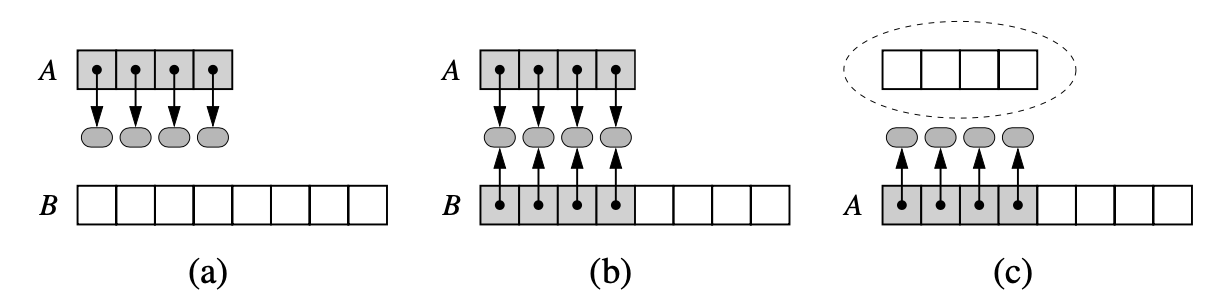

In [32]:
# provides low-level arrays of user-defined types
import ctypes

class DynamicArray:
    '''
    A dynamic array class akin to a simplified Python list
    '''
    
    def __init__(self):
        '''Create an empty array'''
        self._n = 0           # count actual elements
        self._capacity = 1    # default array capacity
        # The reference to the currently allocated low-level array
        self._A = self._make_array(self._capacity)   
        
    def __len__(self):
        '''Return number of elements stored in the array'''
        return self._n
    
    def __getitem__(self, k):
        if not 0 <= k < self._n:
            raise IndexError('invalid index')
        return self._A[k]
    
    def append(self, obj):
        if self._n == self._capacity:
            self._resize(2 * self._capacity)
        self._A[self._n] = obj
        self._n += 1
        
    def _resize(self, c):
        '''Resize internal array to capacity c'''
        B = self._make_array(c)
        for k in range(self._n):
            B[k] = self._A[k]
        self._A = B
        self._capacity = c
        
    def _make_array(self, c):
        '''Return new array with capacity c'''
        return (c * ctypes.py._object)()

### 3.2 Amortized Analysis of Dynamic Arrays

1. Geometric Increase in Capacity
    - Additional space is proportional to the current size of the array

Let S be a sequence implemented by means of a dynamic array with initial capacity one, using the strategy of doubling(or adding 25%, or tripling) the array size when full.
<br><br>
The total time to perform a series of n append operations in s, starting from S being empty, is O(n).
<br><br>
Each append operation is O(1)

2. Arithmetic Progression
    - Additional space is a fixed constant, takes O($n^2$) time
    
#### Memory Usage and Shrinking an Array

To prevent the structure rapidly expand and shrink:
    - The array capacity is halved whenever the number of actual element falls below one fourth of that capacity.

### 3.3 Python's List Class

In [37]:
from time import time
def compute_average(n):
    '''
    Perform n appends to an empty list and return average time elapsed
    '''
    data = []
    start = time()
    for k in range(n):
        data.append(None)
    end = time()
    return (end-start)/n
n_size = [100,1000,10000,100000,1000000,10000000]
for n in n_size:
    n_average = compute_average(n)
    print('For size {}, the average time is {}'.format(n,n_average))

For size 100, the average time is 1.0967254638671875e-07
For size 1000, the average time is 8.797645568847656e-08
For size 10000, the average time is 8.0108642578125e-08
For size 100000, the average time is 8.266925811767578e-08
For size 1000000, the average time is 6.624507904052734e-08
For size 10000000, the average time is 5.7269978523254394e-08


## 4. Efficiency of Python's Sequence Types

### 4.1 List and tuple classes

#### Constant time operations

1. len(data): O(1)
    - An instance explicitly maintains such state information
2. data[j]: O(1)
    - Assured by the underlying access into an array
    
#### Searching for Occurrences of a Value

All below methods proceed through iteration of the sequenc from left to right.
1. data.count(value):O(n)
2. data.index(value):O(k+1)
3. value in data: O(k+1)

#### Lexicographic Comparisons

Comparisons between two sequences.
1. data1 == data2: O(k+1)
    - similarly !=, <,<=,>,>=

In [39]:
data1 = [1,2,3,4,6,8,2]
data2 = [1,2,3,5,6,8,1]
# 4 in data1 < 5 in data2
data1 < data2

True

#### Creating New Instances

1. data[j:k]: O(k-j+1)
    - slicing is creating a new instances
2. data1 + data2: O(n1+n2)
3. c*data: O(cn)

#### Mutating Behaviors

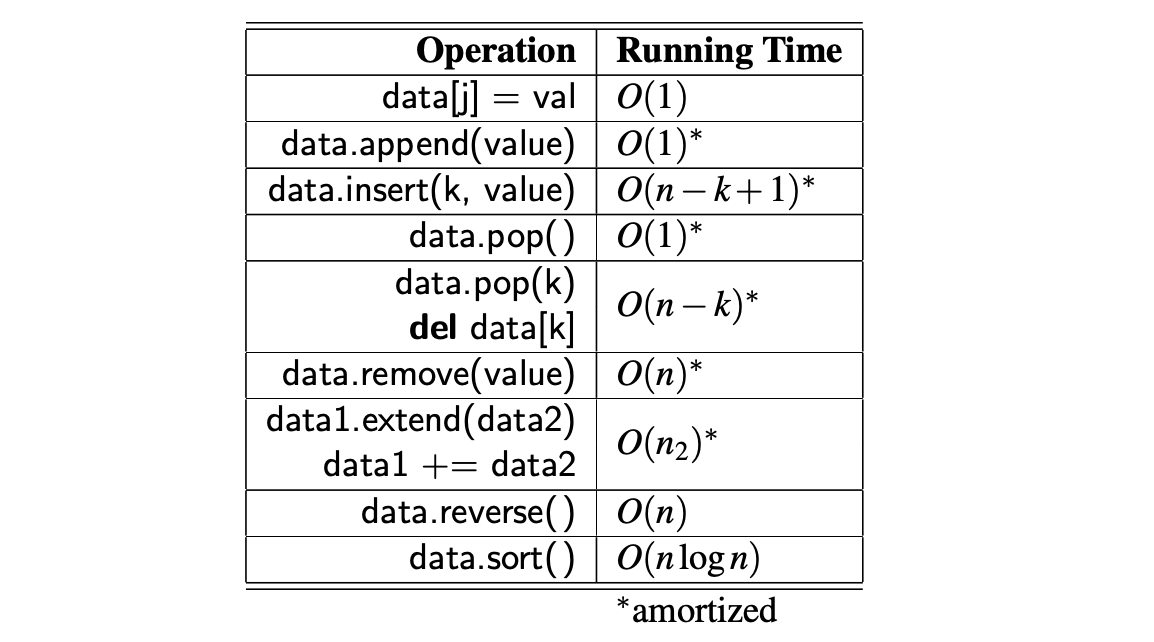

#### Extending a List

In [40]:
## a call to data.extend(other) produces the same result as 
# for element in other:
#     data.apend(element)

The extend is preferable to repeated calls to append:
1. Appropriate Python method are often implemented natively in a compiled language
    - Rather than as interpreted Python code
2. Less overhead to a single function call.
3. Increased efficiency
    - The resulting size of the updated list can be calculated in advance

#### Constructing New Lists

1. List comprehension
    - Significantly faster than building the list by repeatedly appending
2. List initialization
    - [0] * n more efficient thant building such a list incrementally

In [42]:
from time import time
start1 = time()
squares = [k*k for k in range(1000000)]
end1 = time()
time_elapsed1 = end1 - start1

start2 = time()
squares_append = []
for k in range(1000000):
    squares_append.append(k*k)
end2 = time()
time_elapsed2 = end2 - start2

print('List comprehension: ', time_elapsed1)
print('Repeated append: ', time_elapsed2)

List comprehension:  0.07176709175109863
Repeated append:  0.1263442039489746


### 4.2 Python's String Class

#### Pattern Matching

A naive implementation runs in O(mn) time case, because we consider the n-m+1 possible starting indices for the pattern, and we spend O(n) time at each starting position, checking if the pattern matches.

#### Composing Strings

Example:
    - For a large string document, goal is to produce a new string letters that contains only the alphabetic characters of the original string.

In [43]:
# Bad example
document = 'The first application we study is storing a sequence of high score entries for a video game.'
letters = ''
for c in document:
    if c.isalpha():
        letters += c

<font color = 'red'>Strings are immutable</font>
<br>
The command letters += c would build a new string instance and then reassign the identifier letters to the result each time.<br>
If the result has n characters, in total it will take 1 + 2 + 3 + ... + n and therefore O($n^2$) time

In [44]:
# O(n) 
# use a temporary list to store individual pieces
temp = []
for c in document:
    if c.isalpha():
        temp.append(c)
# compose the final result using join
letters = ''.join(temp)

In [45]:
# Further improvement
letters = ''.join([c for c in document if c.isalpha()])
# Further improvement
# avoid the temporary list with a generator comprehension
letters = ''.join(c for c in document if c.isalpha())

## 5. Using Array-Based Sequences

### 5.1 Storing High Scores for a Game

In [46]:
class GameEntry:
    '''
    Represents one entry of a list of high scores
    '''
    def __init__(self, name, score):
        self._name = name
        self._score = score
    
    def get_name(self):
        return self._name
    
    def get_score(self):
        return self._score
    
    def __str__(self):
        return '({0}, {1})'.format(self._name, self._score)

#### A class for High Scores

In [47]:
class Scoreboard:
    '''
    Fixed-length sequence of high scores in nondecreasing order
    '''
    def __init__(self, capacity = 10):
        self._board = [None] * capacity
        # _n: number of actual entries
        self._n = 0
        
    def __getitem__(self, k):
        return self._board[k]
    
    def __str__(self):
        return '\n'.join(str(self._board[j]) for j in range(self._n))
    
    def add(self, entry):
        # Consider adding entry to high scores
        score = entry.get_score()
        # Check qualification
        good = self._n < len(self._board) or score > self._board[-1].get_score()
        
        if good:
            if self._n < len(self._board):
                self._n += 1
            
            j = self._n - 1
            while j > 0 and self._borad[j-1].get_score() < score:
                self._board[j] = self._board[j-1]
                j -= 1
            self._board[j] = entry

### 5.2 Sorting a Sequence

#### Insertion-Sort Algorithm 插入排序

最左面的元素被认为是有序的，对之后的无序元素从左到右依次遍历，把每一个元素插入到左边有序序列中的合适位置。

InsertionSort(A):
    - Input: an array A of n comparable elements
    - Output: The array A with elements rearranged in nondecreasing order.
    - for k from 1 to n-1 do:
        Insert A[k] at its proper location within A[0],A[1],...A[k]

In [56]:
def insertion_sort(A):
    '''
    Sort list of comparable elements into nondecreasing order
    '''
    for k in range(1, len(A)): # from 1 to n-1
        cur = A[k]
        j = k
        while j > 0 and A[j-1] > cur:
            A[j] = A[j-1]
            j -= 1
        A[j] = cur

### 5.3 Simple Cryptography

In [49]:
class CaesarCipher:
    '''
    Class for doing encryption and decryption using a Caesar cipher
    '''
    def __init__(self, shift):
        encoder = [None]*26
        decoder = [None]*26
        for k in range(26):
            encoder[k] = chr((k+shift)%26 + ord('A'))
            decoder[k] = chr((k-shift)%26 + ord('A'))
        self._forward = ''.join(encoder)
        self._backward = ''.join(decoder)
        
    def encrypt(self, message):
        return self._transform(message, self._forward)
    
    def decrypt(self, secret):
        return self._transform(secret, self._backward)
    
    def _transform(self, original, code):
        msg = list(original)
        for k in range(len(msg)):
            if msg[k].isupper():
                j = ord(msg[k]) - ord('A')
                msg[k] = code[j]
        return ''.join(msg)

In [50]:
cipher = CaesarCipher(3)
message = "THE EAGLE IS IN PLAY; MEET AT JOE'S."
coded = cipher.encrypt(message)
print('Secret: ', coded)
answer = cipher.decrypt(coded)
print('Message: ', answer)

Secret:  WKH HDJOH LV LQ SODB; PHHW DW MRH'V.
Message:  THE EAGLE IS IN PLAY; MEET AT JOE'S.


## 6. Multidimensional Data Sets

### Constructing a Multidimensional List

To construct a list of lists with row number r and column number c.
<br>
All r entries of the list 'data' are references to the same instance of a list of c zeros.
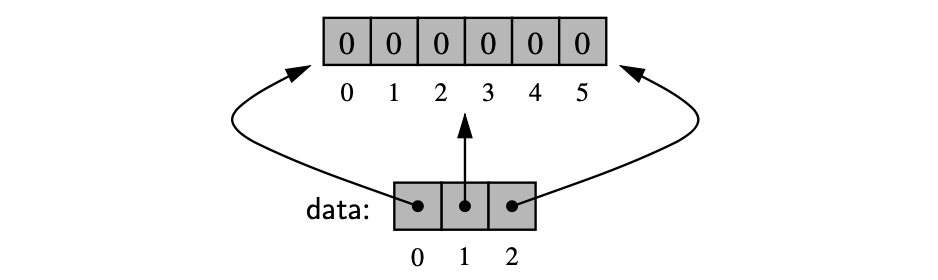

In [57]:
r = 3
c = 5
data = [[0] * c] * r
print(data)

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


In [58]:
data[2][0] = 100
print(data)

[[100, 0, 0, 0, 0], [100, 0, 0, 0, 0], [100, 0, 0, 0, 0]]


#### The proper way to initialize a two-dimensional list:
    
    - Ensure that each cell of the primary list refers to an independent instance of a secondary list. 

In [59]:
data = [[0] * c for j in range(r)]
print(data)
data[2][0] = 100
print(data)

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [100, 0, 0, 0, 0]]


### Tic-Tac-Toe

In [64]:
class TicTacToe:
    
    def __init__(self):
        '''Start a new game'''
        self._board = [[' '] * 3 for j in range(3)]
        self._player = 'X'
    
    def mark(self, i, j):
        '''
        Put an X or O mark at position (i,j) for next player's turn
        '''
        if not(0 <= i <= 2 and 0 <= j <= 2):
            raise ValueError('Invalid board position')
        
        if self._board[i][j] != ' ':
            raise ValueError('Board position occupied')
            
        if self.winner() is not None:
            raise ValueError('Game is already complete')
            
        self._board[i][j] = self._player
        if self._player == 'X':
            self._player = 'O'
        else:
            self._player = 'X'
            
    def _is_win(self, mark):
        '''
        Check whether the board is a win for the given player
        '''
        board = self._board
        row0 = (mark == board[0][0] == board[0][1] == board[0][2])
        row1 = (mark == board[1][0] == board[1][1] == board[1][2])
        row2 = (mark == board[2][0] == board[2][1] == board[2][2])
        column0 = (mark == board[0][0] == board[1][0] == board[2][0])
        column1 = (mark == board[0][1] == board[1][1] == board[2][1])
        column2 = (mark == board[0][2] == board[1][2] == board[2][2])
        diagonal = (mark == board[0][0] == board[1][1] == board[2][2])
        revdia = (mark == board[0][2] == board[1][1] == board[2][0])
        return (row0 or row1 or row2 or column0 or column1 or column2 or diagonal or revdia)
    
    def winner(self):
        for mark in 'XO':
            if self._is_win(mark):
                return mark
        return None
    
    def __str__(self):
        '''
        Return string representation of current game board
        '''
        rows = ['|'.join(self._board[r]) for r in range(3)]
        return '\n-----\n'.join(rows)

In [65]:
T = TicTacToe()
T.mark(1,1)
T.mark(0,0)
T.mark(0,1)
T.mark(2,1)
print(T)

O|X| 
-----
 |X| 
-----
 |O| 
